### 1. Import library

In [1]:
import cv2
from PIL import Image
from IPython.display import display, clear_output

### 2. Define functions

In [10]:
# Define color profile of Pepsi as blue, Coke as red
def colorProfiles(n):
    if n == 0 :
        name = "Pepsi"
        hsv_lower = ( 95,100,100)
        hsv_upper = (115,255,255)
        return (name,hsv_lower,hsv_upper)
    if n == 1 :
        name = "Coke"
        hsv_lower = ( 0,100,100)
        hsv_upper = (10,255,255)
        return (name,hsv_lower,hsv_upper)

# Find contour using HSV color profile
def pepsi_or_coke(frame):  
  hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
  rects = {}

  for i in range(2):
    name, hsv_lower, hsv_upper = colorProfiles(i)
    mask = cv2.inRange(hsv,hsv_lower,hsv_upper)
    conts, herirarchy = cv2.findContours(mask.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    biggest = sorted(conts,key = cv2.contourArea,reverse=True)[0]
    rect = cv2.boundingRect(biggest)
    x,y,w,h = rect
    cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,255),2)
    color = (255, 0, 0) if name == "Pepsi" else (0, 0, 255)
    cv2.putText(frame, name, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
  return frame

### 3. Predict and labelling

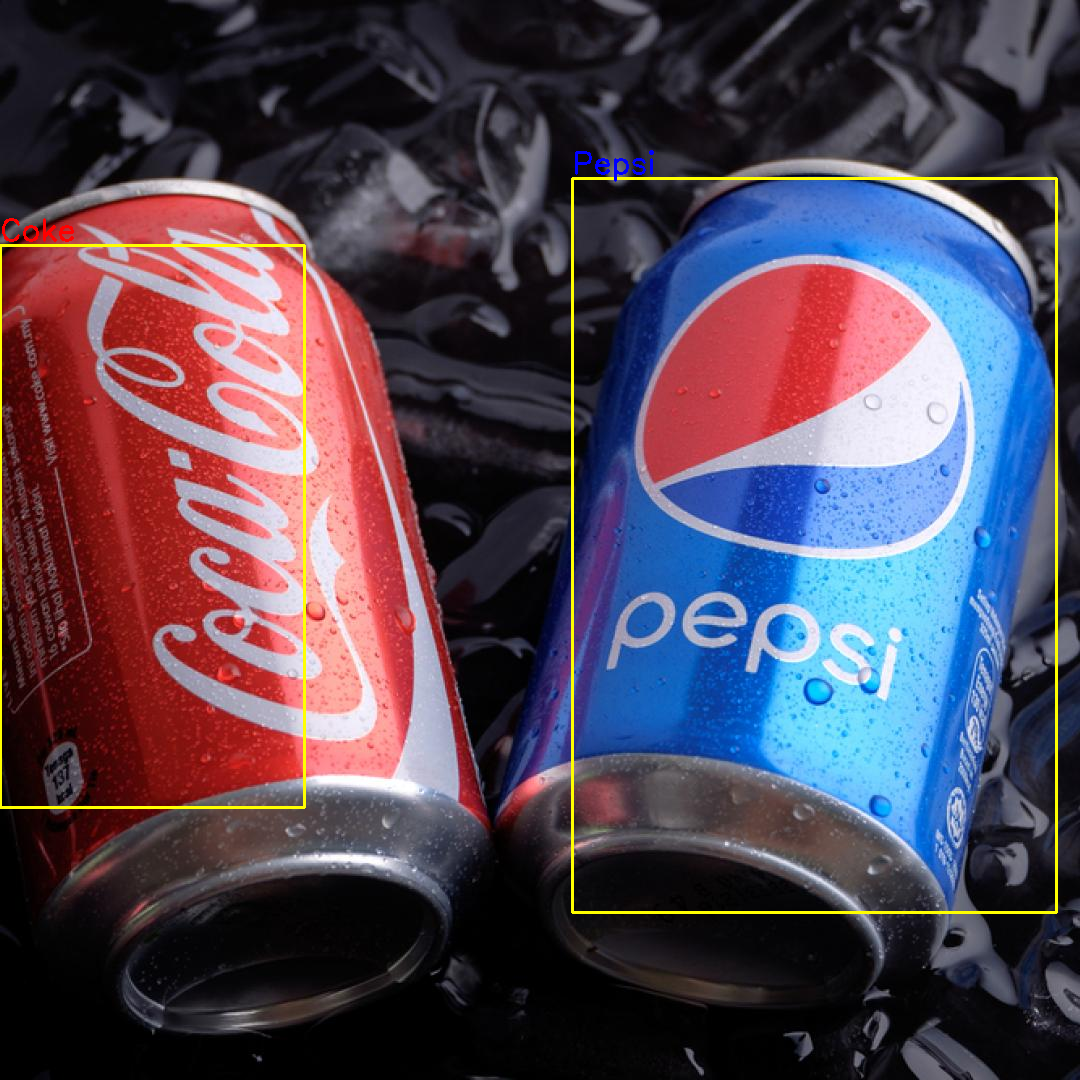

In [11]:
input = cv2.imread("image.jpg")
output = pepsi_or_coke(input)
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
display(Image.fromarray(output))

### Predict image1

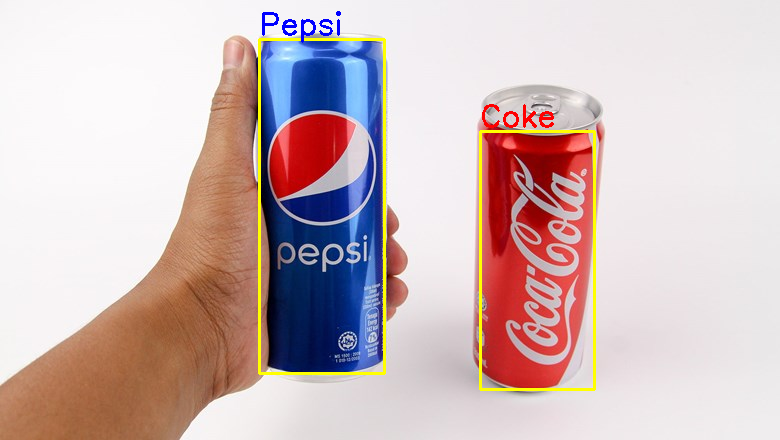

In [12]:
input = cv2.imread("image1.jpg")
output = pepsi_or_coke(input)
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
display(Image.fromarray(output))

### Predict image2

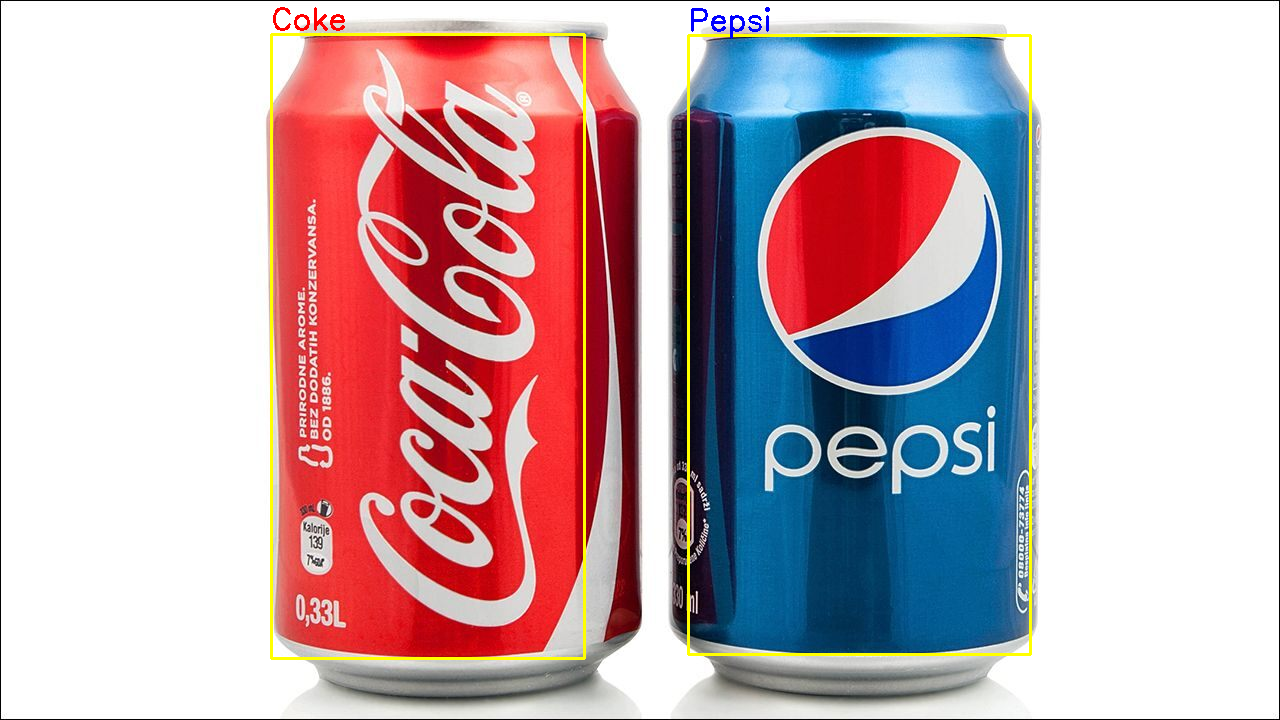

In [13]:
input = cv2.imread("image2.jpg")
output = pepsi_or_coke(input)
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
display(Image.fromarray(output))

### Predict image3

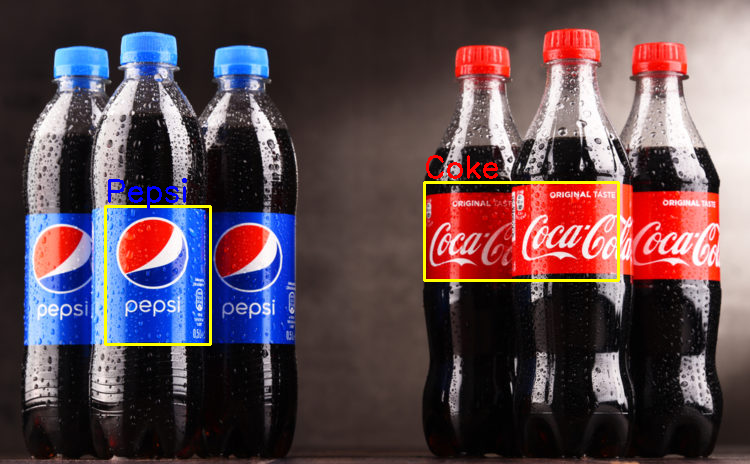

In [14]:
input = cv2.imread("image3.jpg")
output = pepsi_or_coke(input)
output = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
display(Image.fromarray(output))